In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

c:\anaconda3\envs\std\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\anaconda3\envs\std\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
c:\anaconda3\envs\std\lib\site-packages\numpy\.libs\libopenblas64__v0.3.23-246-g3d31191b-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
# 데이터 생성
x = torch.randn(100,2)
y = torch.where(x[:, 0] > x[:, 1], 1, -1).float()

In [3]:
# dataset 정의, loader 정의
dataset = TensorDataset(x, y)
loader = DataLoader(dataset, batch_size=10)

In [4]:
# SVM model info
class SVM(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(2, 1)

    def forward(self, x):
        return self.linear(x)

In [5]:
# 모델, 손실 함수, 옵티마이저 생성
model = SVM()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [6]:
# 모델 학습
for epoch in range(100):
    for inputs, targets in loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs.squeeze(), targets)

        # backward
        loss.backward()
        optimizer.step()

    if (epoch+1) % 10 == 0:
        print(f"Epoch [{epoch+1} / 100], Loss : {loss.item():.4f}")

Epoch [10 / 100], Loss : -91.0801
Epoch [20 / 100], Loss : -200.1519
Epoch [30 / 100], Loss : -309.2458
Epoch [40 / 100], Loss : -418.3404
Epoch [50 / 100], Loss : -527.4354
Epoch [60 / 100], Loss : -636.5309
Epoch [70 / 100], Loss : -745.6269
Epoch [80 / 100], Loss : -854.7230
Epoch [90 / 100], Loss : -963.8196
Epoch [100 / 100], Loss : -1072.9163


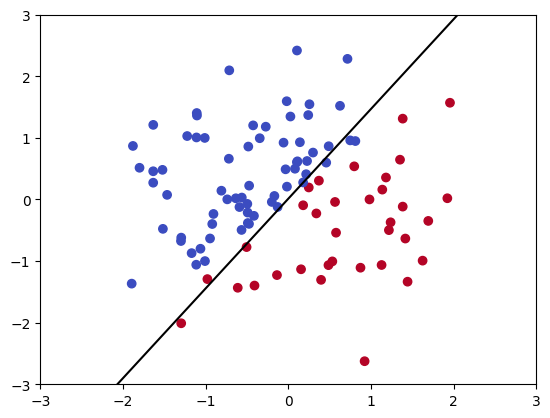

In [7]:
import matplotlib.pyplot as plt
import numpy as np


w = list(model.parameters())[0][0]
b = list(model.parameters())[1].item()

slope = (-w[0] / w[1]).detach().numpy()
intercept = (-b / w[1]).detach().numpy()
x_range = np.linspace(-3, 3, 100)
y_range = slope * x_range + intercept

plt.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.coolwarm)
plt.plot(x_range, y_range, 'k-')
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.show()

In [8]:
import torch
import numpy as np
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.svm import OneClassSVM
import matplotlib.pyplot as plt

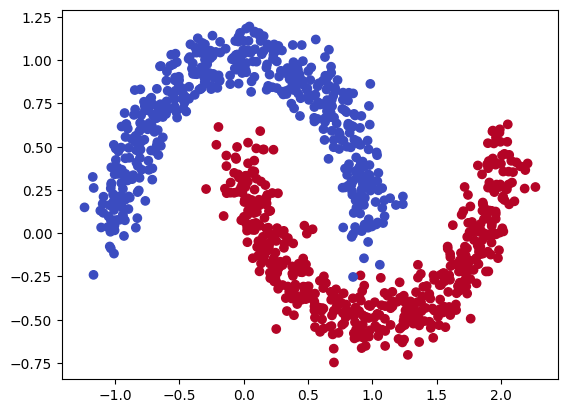

In [9]:
# 데이터 생성
x, y = make_moons(n_samples=1000, noise=0.1, random_state=77)

# 데이터 시각화
plt.scatter(x[:,0], x[:,1], c=y, cmap='coolwarm')
plt.show()

In [10]:
# 이상 데이터 설정
outliers_ratio = 0.1 # 이상치 비율
n_outliers = int(outliers_ratio * len(x)) # 이상치 데이터 개수
n_inliers = len(x) - n_outliers

rng = np.random.RandomState(77) # 난수 생성기 객체
x_outliers = 1.5 * rng.uniform(low=-1, high=3, size=(n_outliers, 2))
x = np.vstack([x, x_outliers])
y = np.hstack([y, -1 * np.ones(n_outliers)])

F1 score : 0.24634987026064056


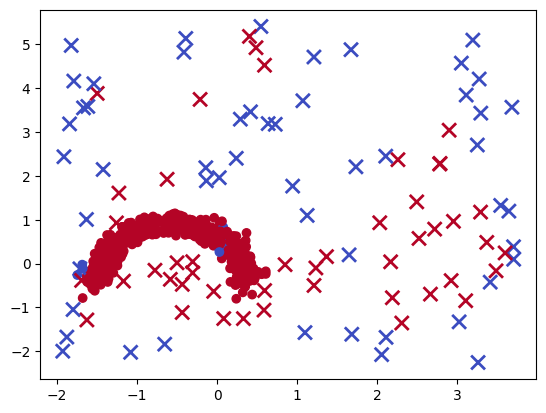

In [12]:
# 데이터 정규화
x = (x - x.mean(axis=0)) / x.std(axis=0)

# 학습 및 평가 데이터 분리
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=77)

# One-class svm 모델 학습
model = OneClassSVM(gamma='auto', kernel='rbf', nu=0.05)
model.fit(x_train)

# 이상 탐지
y_pred = model.predict(x_test)
y_pred = np.where(y_pred == -1, 0, y_pred) # 1, 0
score = f1_score(y_test, y_pred, average='macro')

print(f"F1 score : {score}")

# 모든 데이터 포인트에 대한 예측 결과 얻기
y_pred_all = model.predict(x)

# 이상치 데이터와 정상 데이터를 분리하여 시각화
X_inliers = x[y == 0]
X_outliers = x[y == -1]
y_pred_inliers = y_pred_all[y == 0]
y_pred_outliers = y_pred_all[y == -1]

plt.scatter(X_inliers[:,0], X_inliers[:,1], c=y_pred_inliers, cmap='coolwarm')
plt.scatter(X_outliers[:,0], X_outliers[:,1], c=y_pred_outliers, cmap='coolwarm', marker='x', s=100, linewidths=2)
plt.show()



In [13]:
import torch
import torchvision
import torchvision.transforms as transforms
from sklearn.svm import SVC
from tqdm import tqdm

In [14]:
# 데이터셋 로드 
transform = transforms.Compose([
    transforms.ToTensor(), 
    transforms.Normalize((0.5,), (0.5,))]) # 흑백 (0.5,), (0.5,) 컬러 (0.5, 0.5, 0.5), (0.5, 0.5, 0.5)

train_nset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_nset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)



100%|██████████| 9912422/9912422 [06:37<00:00, 24906.65it/s]


Extracting ./data\MNIST\raw\train-images-idx3-ubyte.gz to ./data\MNIST\raw



100%|██████████| 28881/28881 [00:01<00:00, 19046.10it/s]


Extracting ./data\MNIST\raw\train-labels-idx1-ubyte.gz to ./data\MNIST\raw



100%|██████████| 1648877/1648877 [01:04<00:00, 25568.02it/s]


Extracting ./data\MNIST\raw\t10k-images-idx3-ubyte.gz to ./data\MNIST\raw



100%|██████████| 4542/4542 [00:00<00:00, 5062590.69it/s]

Extracting ./data\MNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\MNIST\raw



In [16]:
train_loader = torch.utils.data.DataLoader(train_nset, batch_size=1000, shuffle=True, num_workers=2)
test_loader = torch.utils.data.DataLoader(test_nset, batch_size=1000, shuffle=True, num_workers=2)


In [19]:
# SVM -> 이미지 픽쳐 값 추출해서 벡터 형태로 변환해서 벡터 값 가지고 분류
# 1. Features
train_features = []
train_labels = []
for i, data in enumerate(train_loader, 0):
    inputs, labels = data
    inputs = inputs.view(inputs.shape[0], -1) # view = 텐서의 모양을 변경하고 리사이즈 하는데 사용
                                              # -1 : 차원이 다른 차원의 크기에 따라서 자동으로 조절
    train_features.append(inputs)
    train_labels.append(labels)

train_features = torch.cat(train_features, dim=0)
# torch.cat() : 여러개의 텐서를 합치는 작업 수행 dim 매개변수 사용해서 결합 방향(차원) 정함 0. 수직방향(행)
train_labels = torch.cat(train_labels, dim=0)


In [21]:
test_features = []
test_labels = []
for i, data in enumerate(test_loader, 0):
    inputs, labels = data
    inputs = inputs.view(inputs.shape[0], -1) 

    test_features.append(inputs)
    test_labels.append(labels)

test_features = torch.cat(test_features, dim=0)
test_labels = torch.cat(test_labels, dim=0)


In [22]:
import time
print("SVM MODEL TRAIN AND TEST")
start_time = time.time()
model = SVC(C=1.0, kernel='rbf', gamma='auto')
model.fit(train_features.numpy(), train_labels.numpy())

acc = model.score(test_features.numpy(), test_labels.numpy())
end_time = time.time()
print("Accuracy: ", acc)
train_time = end_time - start_time
print("모델 실행 시간 : {:.2f} seconds".format(train_time))

SVM MODEL TRAIN AND TEST
Accuracy:  0.9678
모델 실행 시간 : 254.03 seconds


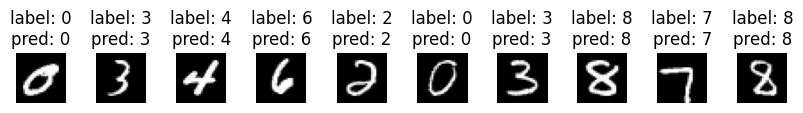

In [24]:
# 예측 결과 시각화
def plot_images(images, labels, preds):
    fig, axes = plt.subplots(1, 10, figsize=(10, 1))
    
    for i, ax in enumerate(axes):
        ax.imshow(images[i].reshape((28, 28)), cmap='gray')
        title = 'label: {}\npred: {}'.format(labels[i], preds[i])
        ax.set_title(title)
        ax.axis('off')
    plt.subplots_adjust(top=0.5, bottom=0, hspace=0, wspace=0.5)
    plt.show()

# 테스트 이미지 가져오기
test_images, test_labels = next(iter(test_loader))
test_images = test_images.view(test_images.shape[0], -1)

# 모델 예측
test_preds = model.predict(test_images.numpy())

# 결과 시각화
plot_images(test_images.numpy(), test_labels.numpy(), test_preds)


In [26]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [29]:
# 데이터 생성
rng = np.random.RandomState(0)
x = rng.randn(100, 10)
y = rng.binomial(1, 0.5, 100)

# 파이프 라인 구성 
svm_pipline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC())
])

# 탐색할 하이퍼파리미터 그리드 생성
param_grid = {
    'svm__C': [0.1, 1, 10],
    'svm__kernel': ['linear', 'rbf'],
    'svm__gamma': ['scale', 'auto']
}


# 그리드 서치 수행 
grid_search = GridSearchCV(svm_pipline, param_grid, cv=5)
grid_search.fit(x, y)

print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

Best parameters: {'svm__C': 0.1, 'svm__gamma': 'scale', 'svm__kernel': 'rbf'}
Best cross-validation score: 0.5799999999999998
